In [1]:
import re
from bs4 import BeautifulSoup

from utils import *

s = Session()

In [2]:
# ARXIV_ID = '1707.04830'
ARXIV_ID = '1711.07064'

ARXIV_URL = f'https://arxiv.org/abs/{ARXIV_ID}'
SW_URL = f'http://sciencewise.info/articles/{ARXIV_ID}'

## arXiv

In [331]:
pd.read_html(ARXIV_URL)[0]

,0,1
0,Comments:,CVPR 2018 camera-ready
1,Subjects:,Computer Vision and Pattern Recognition (cs.CV)
2,Cite as:,arXiv:1711.07064 [cs.CV]
3,NaN,(or arXiv:1711.07064v4 [cs.CV] for this version)


In [83]:
pd.read_html(ARXIV_URL)[0]

,0,1
0,Subjects:,Metric Geometry (math.MG)
1,MSC classes:,"52A10, 52A27, 52A40"
2,Journal reference:,"Aequat. Math. 92 (2018), 993-1000"
3,DOI:,10.1007/s00010-018-0565-4
4,Cite as:,arXiv:1707.04830 [math.MG]
5,NaN,(or arXiv:1707.04830v4 [math.MG] for this vers...


In [339]:
html_doc = s.get(ARXIV_URL).text
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify()[:2000])

'<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html lang="en" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <title>\n   [1711.07064] DeblurGAN: Blind Motion Deblurring Using Conditional Adversarial Networks\n  </title>\n  <link href="https://static.arxiv.org/static/browse/0.2.5/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="https://static.arxiv.org/static/browse/0.2.5/css/arXiv.css?v=20190307" media="screen" rel="stylesheet" type="text/css"/>\n  <link href="https://static.arxiv.org/static/browse/0.2.5/css/browse_search.css" media="screen" rel="stylesheet" type="text/css"/>\n  <!-- Matomo -->\n  <script type="text/javascript">\n   var _paq = window._paq || [];\n    /* tracker methods like "setCustomDimension" should be called before "trackPageView" */\n    _paq.push(["setCookieDomain", "*.arxiv.org"]);\n    _paq.push([\'trackPageVi

In [340]:
print(soup.get_text()[:2000])





[1711.07064] DeblurGAN: Blind Motion Deblurring Using Conditional Adversarial Networks





    var _paq = window._paq || [];
    /* tracker methods like "setCustomDimension" should be called before "trackPageView" */
    _paq.push(["setCookieDomain", "*.arxiv.org"]);
    _paq.push(['trackPageView']);
    _paq.push(['enableLinkTracking']);
    (function() {
      var u="https://webstats.arxiv.org/";
      _paq.push(['setTrackerUrl', u+'matomo.php']);
      _paq.push(['setSiteId', '1']);
      var d=document, g=d.createElement('script'), s=d.getElementsByTagName('script')[0];
      g.type='text/javascript'; g.async=true; g.defer=true; g.src=u+'matomo.js'; s.parentNode.insertBefore(g,s);
    })();
  




window.ATL_JQ_PAGE_PROPS =  {
  "triggerFunction": function(showCollectorDialog) {
    //Requires that jQuery is available!
    jQuery("#feedback-button").click(function(e) {
      e.preventDefault();
      showCollectorDialog();
    });
  },
  fieldValues: {
    "components": ["1570

### Stats

#### Submissions

In [9]:
submissions_df = pd.read_csv('https://arxiv.org/stats/get_monthly_submissions').set_index('month')
pd.concat([submissions_df.head(10), submissions_df.tail(10)])

,submissions,historical_delta
month,,
1991-07,2,-2
1991-08,28,-1
1991-09,58,0
1991-10,76,0
1991-11,64,0
1991-12,78,0
1992-01,193,-105
1992-02,134,-10
1992-03,120,-3


In [10]:
submissions_df.sum()

submissions         1579952
historical_delta      -2431
dtype: int64

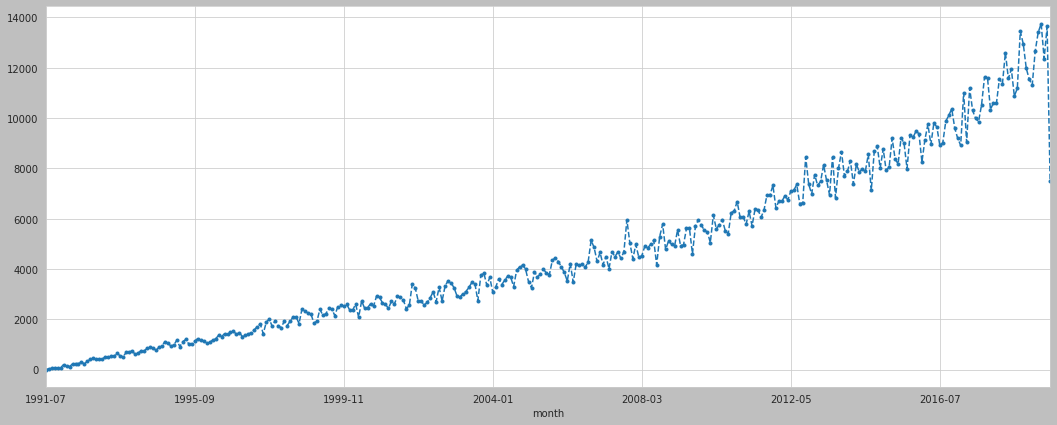

In [299]:
submissions_df['submissions'].plot(style='--.');

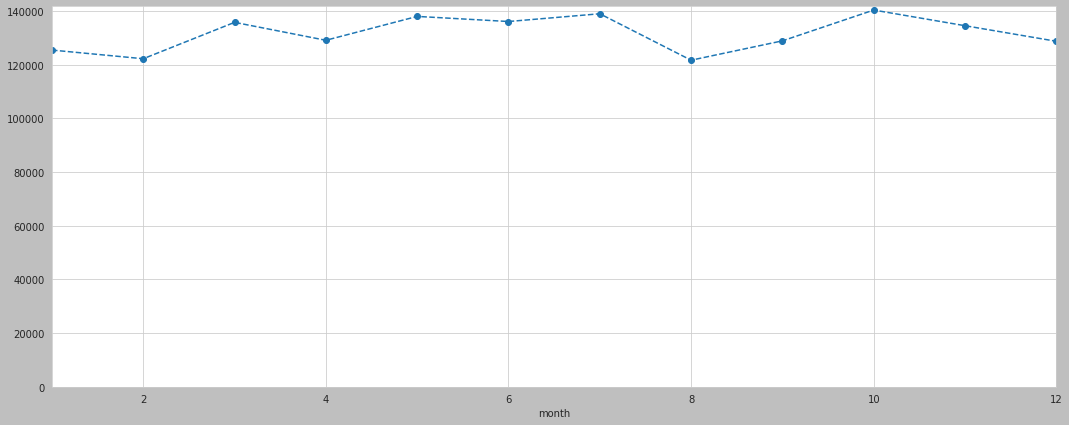

In [300]:
tmp_df = submissions_df.reset_index()
tmp_df['month'] = tmp_df['month'].map(lambda x: int(x.split('-')[-1]))
tmp_df = tmp_df.groupby('month')['submissions'].sum()
tmp_df.plot(style='--o', ylim=(0, tmp_df.max() * 1.01));#.sort_values(ascending=False)

#### Downloads

In [344]:
downloads_s = pd.read_csv('https://arxiv.org/stats/get_monthly_downloads').set_index('month')['downloads']
pd.concat([downloads_s.head(10), downloads_s.tail(10)])

month
1994-01           0
1994-02        1863
1994-03        7048
1994-04        6814
1994-05        9601
1994-06       11007
1994-07        9488
1994-08       10789
1994-09       12872
1994-10       16260
2018-10    19443085
2018-11    23040835
2018-12    18694165
2019-01    19281479
2019-02    18464161
2019-03    23035822
2019-04    24714027
2019-05    28369333
2019-06    26431370
2019-07    24649611
Name: downloads, dtype: int64

In [345]:
downloads_s.sum()

1433001780

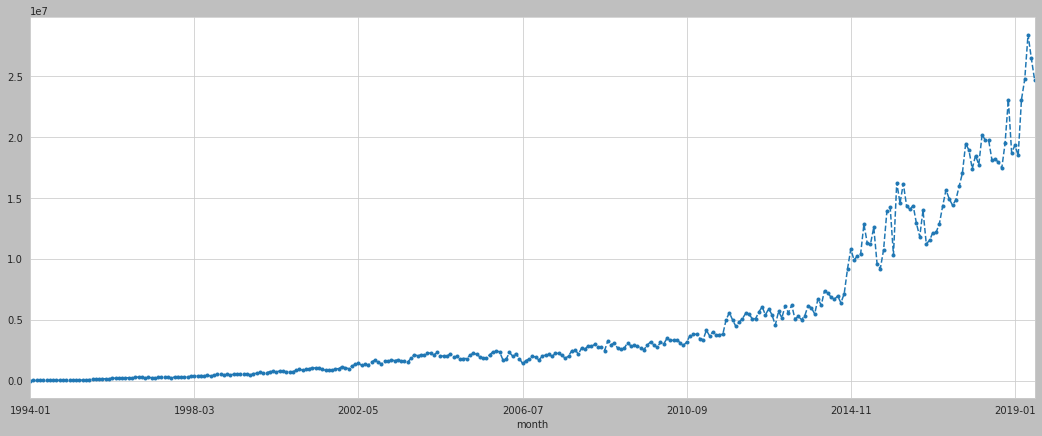

In [302]:
downloads_s.plot(style='--.');

### Dump (third-side, not used)

In [1]:
from ast import literal_eval

In [2]:
df = pd.read_json('./data/arxivData.json')
for field in ['author', 'link', 'tag']:
    df[field] = df[field].map(literal_eval)
df.shape

(41000, 9)

In [3]:
df.sample(5)

,author,day,id,link,month,summary,tag,title,year
13568,"[{'name': 'Tamal Datta Chaudhuri'}, {'name': '...",18,1604.05008v1,"[{'rel': 'related', 'href': 'http://dx.doi.org...",4,Volatility in stock markets has been extensive...,"[{'term': 'cs.NE', 'scheme': 'http://arxiv.org...",Forecasting Volatility in Indian Stock Market ...,2016
37230,"[{'name': 'Anagha Kulkarni'}, {'name': 'Yantia...",16,1611.05497v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",11,In order to have effective human AI collaborat...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Explicablility as Minimizing Distance from Exp...,2016
19453,"[{'name': 'N. L. Zhang'}, {'name': 'W. Zhang'}]",30,1107.0042v1,"[{'rel': 'related', 'href': 'http://dx.doi.org...",6,Value iteration is a popular algorithm for fin...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Restricted Value Iteration: Theory and Algorithms,2011
15673,[{'name': 'Valentin Kassarnig'}],13,1601.03313v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",1,In this report we present a system that can ge...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Political Speech Generation,2016
24986,"[{'name': 'Marc Niethammer'}, {'name': 'Kilian...",22,1501.05680v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",1,Segmentation is a fundamental task for extract...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Active Mean Fields for Probabilistic Image Seg...,2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 9 columns):
author     41000 non-null object
day        41000 non-null int64
id         41000 non-null object
link       41000 non-null object
month      41000 non-null int64
summary    41000 non-null object
tag        41000 non-null object
title      41000 non-null object
year       41000 non-null int64
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


In [5]:
df.describe()

,day,month,year
count,41000.000000,41000.000000,41000.000000
mean,15.833293,6.547488,2014.484073
std,8.699371,3.525254,3.685414
min,1.000000,1.000000,1993.000000
25%,8.000000,3.000000,2013.000000
50%,16.000000,6.000000,2016.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [6]:
df['new_id'] = df.apply(lambda x: f"{x['year']}{x['month']:02d}"[-4:], 1)
df['match'] = df['new_id'].astype(int) <= df['id'].str.split('/').map(lambda x: x[-1]).str[:4].astype(int)
# df['match'] = df.apply(lambda x: (int(x['new_id']) + 1 == int(x['id'].split('/')[-1][:4])) if not x['match'] else x['match'], 1)
df['match'].value_counts()

True     40999
False        1
Name: match, dtype: int64

In [7]:
df[~df['match']]

,author,day,id,link,month,summary,tag,title,year,new_id,match
33936,"[{'name': 'Kuang-hua Chen'}, {'name': 'Hsin-Hs...",1,cmp-lg/9405034v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,To acquire noun phrases from running texts is ...,"[{'term': 'cmp-lg', 'scheme': 'http://arxiv.or...",Extracting Noun Phrases from Large-Scale Texts...,1994,9406,False


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



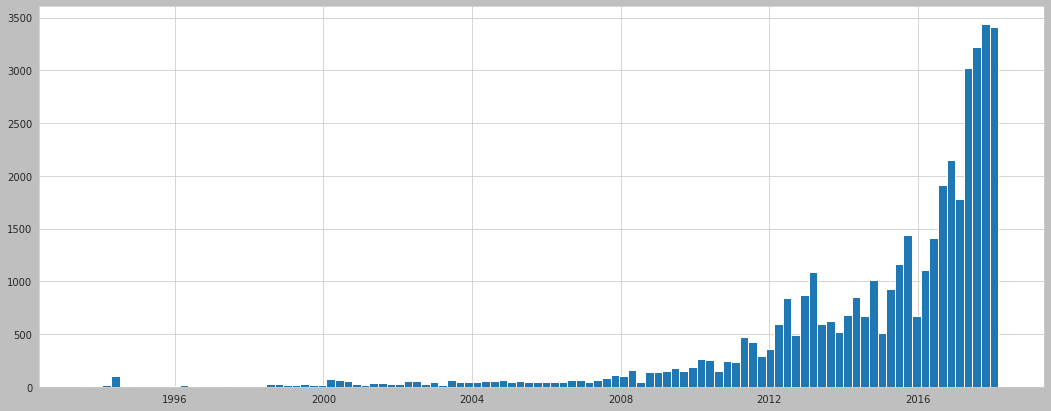

In [8]:
df.apply(lambda x: pd.datetime(x['year'], x['month'], 1), 1).hist(bins='auto');

In [9]:
df['author'].map(len).value_counts()

3     10622
2     10478
4      7335
1      5130
5      3818
6      1854
7       830
8       392
9       195
10      109
11       68
12       47
13       32
14       21
15       13
17        9
16        9
18        9
25        4
19        3
22        3
50        2
30        2
24        2
36        1
67        1
34        1
31        1
74        1
75        1
51        1
20        1
21        1
23        1
29        1
61        1
32        1
Name: author, dtype: int64

In [10]:
df['link'].map(len).value_counts()

2    36020
3     4975
5        2
9        1
8        1
7        1
Name: link, dtype: int64

In [11]:
df['tag'].map(len).value_counts()

1     18120
2     11744
3      7320
4      2568
5       874
6       275
7        83
8        10
9         3
10        2
11        1
Name: tag, dtype: int64

## SW

If user is registered in SW - no view of papers then from authors side

### articles

[Identifier Scheme](https://arxiv.org/help/arxiv_identifier_for_services)

Different view:
- http://sciencewise.info/bookmarks/0705.1298/add (more extended with statistics, types of concepts, etc.)
- http://sciencewise.info/articles/0705.1298 (just list of concepts)

In [348]:
html_doc = s.get(SW_URL).text
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify()[:2000])

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="en" http-equiv="content-language"/>
  <title>
   DeblurGAN: Blind Motion Deblurring Using Conditional Adversarial   Networks (1711.07064) - ScienceWISE
  </title>
  <script src="/media/build/js/vendor.bundle.js" type="text/javascript">
  </script>
  <script src="/media/build/js/app.bundle.js" type="text/javascript">
  </script>
  <link href="/media/css/style.css" rel="stylesheet" type="text/css"/>
  <link href="/media/libs/flexbox/css/jquery.flexbox.css" rel="stylesheet" type="text/css"/>
  <link href="/media/libs/bootstrap/css/bootstrap.css" rel="stylesheet" type="text/css"/>
  <link href="/media/libs/bootstrap/css/bootstrap-responsive.css" rel="stylesheet" type="text/css"/>
  <link href="/media/libs/datepicker/css/datepicker.css" rel="stylesheet" type="text/css"/>
  <link href="/media/libs/bootstrap-dateran

In [349]:
print(soup.get_text()[:2000])


DeblurGAN: Blind Motion Deblurring Using Conditional Adversarial   Networks (1711.07064) - ScienceWISEScienceWISEOntologyBookmarksNew articlesNewsIntroduction swapp.initSearch();LoginRegister×Bookmarked by:arXiv:1711.07064AbstractPDFAdd annotationFind in NASA ADSFind in INSPIREDeblurGAN: Blind Motion Deblurring Using Conditional Adversarial   Networks
                 ver. 4Orest Kupyn,
            
                Volodymyr Budzan,
            
                Mykola Mykhailych,
            
                Dmytro Mishkin,
            
                Jiri Matas
                Computer Vision and Pattern Recognition
        We present DeblurGAN, an end-to-end learned method for motion deblurring. The learning is based on a conditional GAN and the content loss . DeblurGAN achieves state-of-the art performance both in the structural similarity measure and visual appearance. The quality of the deblurring model is also evaluated in a novel way on a real-world problem -- object detection

In [350]:
res = soup.find(attrs={'class': 'found-concepts'})
len(res)

42

In [37]:
pd.DataFrame({'text': e.text, **e.attrs} for e in res)

,class,data-id,data-list,data-url,text
0,"[label, label-concept, label-default]",203495,,/ontology/Generative_Adversarial_Net,Generative Adversarial Net
1,"[label, label-concept, label-default]",202775,,/ontology/convolutional_neural_network,Convolutional neural network
2,"[label, label-concept, label-default]",202307,,/ontology/Architecture,Architecture
3,"[label, label-concept, label-default]",203474,,/ontology/object_detection,Object detection
4,"[label, label-concept, label-default]",202951,,/ontology/optimization_1,Optimization
5,"[label, label-concept, label-default]",203309,,/ontology/Ground_truth,Ground truth
6,"[label, label-concept, label-default]",17759,,/ontology/Inference_1,Inference
7,"[label, label-concept, label-default]",17186,,/ontology/Deep_learning,Deep learning
8,"[label, label-concept, label-default]",5487,,/ontology/Sun_7,Sun
9,"[label, label-concept, label-default]",5316,,/ontology/signal_to_noise_ratio,Signal to noise ratio


In [110]:
def article2doc(url):
    html = s.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    _id = int(soup.find(attrs={'class': 'article'}).attrs['data-pk'])
    arxiv_id = soup.find(attrs={'class': 'article'}).attrs['data-id']
    title = soup.find(attrs={'class': 'title'})
    versions = title.find(attrs={'class': 'label'})
    versions = int(versions.text.split()[-1]) if versions else 1
    title = '\n'.join(title.text.split('\n')[:-1 if versions > 1 else -2])
    authors = [a.text.strip() for a in soup.find_all(attrs={'class': 'author'}) or []]
    categories = [c.attrs['data-code'] for c in soup.find(attrs={'class': 'categories'})]
    primary_category = soup.find(attrs={'class': 'primary'})
    if primary_category:
        primary_category = primary_category.attrs['data-code']
    abstract = soup.find('p').text
    concepts = [int(c.attrs['data-id']) for c in soup.find(attrs={'class': 'found-concepts'}) or []]
    tmp_ref, tmp_cit = soup.find_all(attrs={'class': 'span6'})[:2]
    tmp_ref = tmp_ref.find_all('li')
    tmp_cit = tmp_cit.find_all('li')
    all_lis = soup.find_all('li')
    references = []
    if tmp_ref:
        for l in all_lis:
            if tmp_cit:
                if l == tmp_cit[0]:
                    break
            if references or (l == tmp_ref[0]):
                references.append(l)
    references_ids = [r.find('a').attrs['href'] for r in references if r.find('a')]
    references_ids = [r[10:-1] if r.startswith('/articles/') else r for r in references_ids]
    references = [r.text for r in references]
    citations = []
    if tmp_cit:
        for l in all_lis:
            if citations or (l == tmp_cit[0]):
                citations.append(l)
    citations_ids = [c.find('a').attrs['href'] for c in citations if c.find('a')]
    citations_ids = [c[10:-1] if c.startswith('/articles/') else c for c in citations_ids]
    citations = [c.text for c in citations]
    bookmarked = soup.find(attrs={'class': 'article-bookmark-count-info'})
    bookmarked = [b.text.strip() for b in bookmarked.find_all('a')] if bookmarked else []
    doc = {
        '_id': _id,
        'arxiv_id': arxiv_id,
        'title': title,
        'versions': versions,
        'authors': authors,
        'authors_len': len(authors),
        'categories': categories,
        'categories_len': len(categories),
        'primary_category': primary_category,
        'abstract': abstract,
        'concepts': concepts,
        'concepts_len': len(concepts),
        'references': references,
        'references_len': len(references),
        'references_ids': references_ids,
        'references_ids_len': len(references_ids),
        'citations': citations,
        'citations_len': len(citations),
        'citations_ids': citations_ids,
        'citations_ids_len': len(citations_ids),
        'bookmarked': bookmarked,
        'bookmarked_len': len(bookmarked)
    }
    inspire_record = soup.find('a', {'href': re.compile(r'\.net/record')})
    if inspire_record:
        inspire_record = inspire_record.attrs['href'].split('record/')[-1]
        doc['inspire_record'] = inspire_record
    doi = soup.find('a', {'href': re.compile(r'doi')})
    if doi:
        doi = doi.attrs['href'].split('doi.org/')[-1]
        doc['doi'] = doi
    alert = soup.find(attrs={'class': 'alert-warning'})
    if alert:
        alert = alert.text.strip()
        doc['alert'] = alert
    return doc

In [4]:
pd.Series(article2doc('http://sciencewise.info/articles/0704.0005'))

_id                                                              299616
arxiv_id                                                      0704.0005
title                 From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...
versions                                                              1
authors                         [Wael Abu-Shammala, Alberto Torchinsky]
authors_len                                                           2
categories                                           [math.CA, math.FA]
categories_len                                                        2
primary_category                                                math.CA
abstract              In this paper we show how to compute the $\Lam...
concepts              [14216, 14382, 7388, 8731, 1048, 29090, 15017,...
concepts_len                                                         15
references                                                           []
references_len                                                  

In [5]:
pd.Series(article2doc('http://sciencewise.info/articles/1711.07064'))

_id                                                             1475249
arxiv_id                                                     1711.07064
title                 DeblurGAN: Blind Motion Deblurring Using Condi...
versions                                                              4
authors               [Orest Kupyn, Volodymyr Budzan, Mykola Mykhail...
authors_len                                                           5
categories                                                      [cs.CV]
categories_len                                                        1
primary_category                                                  cs.CV
abstract              We present DeblurGAN, an end-to-end learned me...
concepts              [203495, 202775, 202307, 203474, 202951, 20330...
concepts_len                                                         42
references            [Dmitry Ulyanov, Andrea Vedaldi, Victor Lempit...
references_len                                                  

In [6]:
pd.Series(article2doc('http://sciencewise.info/articles/1707.04830/'))

_id                                                             1388956
arxiv_id                                                     1707.04830
title                 On Banach-Mazur distance between planar convex...
versions                                                              4
authors                  [Serhii Brodiuk, Nazarii Palko, Andriy Prymak]
authors_len                                                           3
categories                                                    [math.MG]
categories_len                                                        1
primary_category                                                math.MG
abstract              Upper estimates of the diameter and the radius...
concepts                        [12063, 8741, 30339, 1461, 16363, 3262]
concepts_len                                                          6
references            [article author= Fleischer, Rudolf , author= M...
references_len                                                  

In [7]:
pd.Series(article2doc('http://sciencewise.info/articles/1706.01920/'))

_id                                                             1370377
arxiv_id                                                     1706.01920
title                 BBN for the LHC: constraints on lifetimes of t...
versions                                                              1
authors                              [Anthony Fradette, Maxim Pospelov]
authors_len                                                           2
categories                                             [hep-ph, hep-ex]
categories_len                                                        2
primary_category                                                 hep-ph
abstract               LHC experiments can provide a remarkable sens...
concepts              [31628, 1315, 15965, 3032, 3382, 4657, 3317, 3...
concepts_len                                                        156
references            [Jackson D. Clarke, Robert Foot, Raymond R. Vo...
references_len                                                  

In [11]:
all_articles = []
for month, submissions_count in submissions_df.iloc[12*15 + 9:]['submissions'].iteritems():
    leading_zeros = 4 if month < '2015' else 5
    for i in range(submissions_count):
        all_articles.append(f'{month[2:4]}{month[-2:]}.{(i + 1):0{leading_zeros}d}')
len(all_articles)

1165694

In [12]:
all_articles[:10]

['0704.0001',
 '0704.0002',
 '0704.0003',
 '0704.0004',
 '0704.0005',
 '0704.0006',
 '0704.0007',
 '0704.0008',
 '0704.0009',
 '0704.0010']

In [13]:
all_articles[-10:]

['1908.07503',
 '1908.07504',
 '1908.07505',
 '1908.07506',
 '1908.07507',
 '1908.07508',
 '1908.07509',
 '1908.07510',
 '1908.07511',
 '1908.07512']

In [99]:
mc['sw']['articles'].count_documents({})

117997

In [114]:
docs = []
bad_articles = set({
#     '0901.4014'
})
total_errors = 0

try:
    for aid in tn(all_articles[853827 + 1:]):
#         if aid in bad_articles:
#             continue
        url = f'http://sciencewise.info/articles/{aid}'
        try:
            doc = article2doc(url)
            mc['sw']['articles'].insert_one(doc)
        except Exception as e:
            print(f'{aid} - {e}')
            total_errors += 1
            if total_errors > 296:
                raise e
#         docs.append(doc)
#         if len(docs) > 999:  # - len(bad_articles):
#             mc['sw']['articles'].insert_many(docs)
#             docs = []
#     if docs:
#         mc['sw']['articles'].insert_many(docs)
    m = '[SW] - done'
except Exception as e:
    m = f'[SW] - error:\n{aid}\n{e}'
tgn(m)
print(m)

1705.10549 - 'NoneType' object has no attribute 'attrs'
1706.02893 - WiredTigerIndex::insert: key too large to index, failing  1236 { : "M. Raidal, A. van der Schaaf, I. Bigi, M. L. Mangano, Y. Semertzidis, S. Abel, S. Albino, S. Antusch, E. Arganda, B. Bajc, S. Banerjee, C. Biggio, M. ..." }
1706.03039 - E11000 duplicate key error collection: sw.articles index: _id_ dup key: { : 618062 }
1706.06154 - WiredTigerIndex::insert: key too large to index, failing  1140 { : "et al. (2011) Grogin , Kocevski , Faber , Ferguson , Koekemoer , Riess , Acquaviva , Alexander , Almaini , Ashby , Barden , Bell , Bournaud , Brown , ..." }
1706.06280 - 'NoneType' object has no attribute 'attrs'
1706.06606 - WiredTigerIndex::insert: key too large to index, failing  1263 { : "Descouveσn, P., γ (µb) Potential E = 23.3 keV E = 150 keV E = 500 keV E = 750 keV s wave p wave Unscaled Scaled Unscaled Scaled Unscaled Scaled Uns..." }
1706.08512 - E11000 duplicate key error collection: sw.articles index: _id_ dup

1712.08359 - 'NoneType' object has no attribute 'attrs'
1712.08360 - 'NoneType' object has no attribute 'attrs'
1712.08425 - 'NoneType' object has no attribute 'attrs'
1712.08437 - 'NoneType' object has no attribute 'attrs'
1712.08461 - 'NoneType' object has no attribute 'attrs'
1712.08472 - 'NoneType' object has no attribute 'attrs'
1712.08476 - 'NoneType' object has no attribute 'attrs'
1712.08479 - 'NoneType' object has no attribute 'attrs'
1712.08484 - 'NoneType' object has no attribute 'attrs'
1712.08502 - 'NoneType' object has no attribute 'attrs'
1712.08522 - 'NoneType' object has no attribute 'attrs'
1712.08527 - 'NoneType' object has no attribute 'attrs'
1712.08560 - 'NoneType' object has no attribute 'attrs'
1712.08599 - 'NoneType' object has no attribute 'attrs'
1801.00995 - WiredTigerIndex::insert: key too large to index, failing  1278 { : "S. Manzeli, A. Allain, A. Ghadimi, and A. Kis, https://pubs.acs.org/doi/abs/10.1021/acs.nanolett.5b01689 Nano Lett. 15 , 5330 (2015) ; 

1809.03846 - 'NoneType' object has no attribute 'attrs'
1809.05337 - WiredTigerIndex::insert: key too large to index, failing  4910 { : "et al. (2015) Shao , Gan , Epifanovsky , Gilbert , Wormit , Kussmann , Lange , Behn , Deng , Feng , Ghosh , Goldey , Horn , Jacobson , Kaliman , Khali..." }
1809.06384 - WiredTigerIndex::insert: key too large to index, failing  1662 { : "Deriving σL from the experiment sensitivity.—The conversion of the instrumental noise to σL is derived by matching the rms of noise flux Fn to the..." }
1810.02441 - WiredTigerIndex::insert: key too large to index, failing  1456 { : "et al. (2015) Flaugher , Diehl , Honscheid , Abbott , Alvarez , Angstadt , Annis , Antonik , Ballester , Beaufore , Bernstein , Bernstein , Bigelow , ..." }
1810.03759 - WiredTigerIndex::insert: key too large to index, failing  1369 { : "Ya. B. Zeldovich, Sov. Phys. JETP Lett. 12 , 307 (1970); G. L. Murphy, Phys. Rev. D 8 , 4231 (1973); B. L. Hu, Phys. Lett. A 90 , 375 (1982); J. A. S....

1904.00189 - 'NoneType' object has no attribute 'attrs'
1904.04305 - WiredTigerIndex::insert: key too large to index, failing  1265 { : "et al. (2004) Maas , Achenbach , Aulenbacher , Baunack , Capozza , Diefenbach , Grimm , Imai , Hammel , von Harrach , Kabu , Kothe , Lee , Lorente , L..." }
1904.05910 - WiredTigerIndex::insert: key too large to index, failing  2662 { : "et al. (2008) Moortgat-Pick , Abe , Alexander , Ananthanarayan , Babich , Bharadwaj , Barber , Bartl , Brachmann , Chen , Clarke , Clendenin , Dainton..." }
1904.05980 - E11000 duplicate key error collection: sw.articles index: _id_ dup key: { : 1743385 }
1904.08436 - WiredTigerIndex::insert: key too large to index, failing  2648 { : "Collaboration et al. (2016)Collaboration, Ade, Aghanim, Arnaud, Ashdown, Aumont, Baccigalupi, Banday, Barreiro, Bartlett, Bartolo, Battaner, Battye, B..." }
1904.10008 - WiredTigerIndex::insert: key too large to index, failing  1140 { : "et al.(2014) Levan , Tanvir , Starling , Wiersema 

In [116]:
done = set()

for a in tn(mc['sw']['articles'].find({}, ['arxiv_id'])):
    done.add(a['arxiv_id'])
len(done)

1165223

In [119]:
bad_arxiv_ids = list(set(all_articles) - done)
bad_arxiv_ids.sort()
len(bad_arxiv_ids)

471

Manual work here

In [120]:
bad_arxiv_ids = [
    '0804.0193',  # citation is large, 56K-57K
    '0901.4014',  # SW site error, 105K-106K
    '0904.0343',  # citation is large, 117K-118K
    '1005.0836',  # SW cite error?
    '1005.0837',  # SW cite error?
    '1005.5600',  # SW cite error?
    '1005.5618',  # SW cite error?
    '1008.3138',  # SW cite error?
    '1008.3153',  # SW cite error?
    '1009.5814',  # reference/citation is large
    '1105.2364',  # SW cite error?
    '1105.2365',  # SW cite error?
    '1105.2519',  # SW cite error?
    '1105.2536',  # SW cite error?
    '1105.2754',  # reference/citation is large
    '1109.0195',  # SW cite error?
    '1308.0400',  # SW cite error?
    '1308.4273',  # SW cite error?
    '1312.4049',  # SW cite error?
    '1402.6874',  # reference/citation is large
    '1403.6677',  # dup _id: 1041610
    '1408.6088',  # reference/citation is large
    '1410.1272',  # SW cite error?
    '1412.5397',  # SW cite error?
    '1501.07541',  # reference/citation is large
    '1503.00335',  # reference/citation is large
    '1504.02285',  # reference/citation is large
    '1505.02080',  # reference/citation is large
    '1506.06055',  # SW cite error?
    '1507.08591',  # reference/citation is large
    '1507.08853',  # reference/citation is large
    '1508.03246',  # reference/citation is large
    '1510.00381',  # reference/citation is large
    '1510.03815',  # reference/citation is large
    '1601.00077',  # SW cite error?
    '1601.00288',  # SW cite error?
    '1601.00422',  # SW cite error?
    '1601.00533',  # SW cite error?
    '1601.00632',  # SW cite error?
    '1601.00731',  # SW cite error?
    '1601.00735',  # SW cite error?
    '1601.00738',  # SW cite error?
    '1601.00780',  # SW cite error?
    '1601.00816',  # SW cite error?
    '1601.00820',  # SW cite error?
    '1601.00828',  # SW cite error?
    '1601.00896',  # SW cite error?
    '1601.01027',  # SW cite error?
    '1601.01150',  # SW cite error?
    '1601.01208',  # SW cite error?
    '1601.01216',  # SW cite error?
    '1601.01270',  # SW cite error?
    '1601.01285',  # SW cite error?
    '1602.02757',  # reference/citation is large
    '1604.03789',  # reference/citation is large
    '1605.01223',  # SW cite error?
    '1606.05652',  # reference/citation is large
    '1607.05051',  # reference/citation is large
    '1608.03892',  # reference/citation is large
    '1609.03826',  # reference/citation is large
    '1609.08167',  # reference/citation is large
    '1609.09075',  # reference/citation is large
    '1610.00897',  # reference/citation is large
    '1610.01390',  # SW cite error?
    '1610.07578',  # reference/citation is large
    '1611.02389',  # reference/citation is large
    '1611.07044',  # reference/citation is large
    '1611.10023',  # dup _id: 1253054
    '1612.00618',  # reference/citation is large
    '1612.06478',  # SW cite error?
    '1612.07105',  # reference/citation is large
    '1702.01665',  # dup _id: 1136456
    '1702.05349',  # dup _id: 1220138
    '1702.06724',  # SW cite error?
    '1703.01059',  # reference/citation is large
    '1703.02744',  # SW cite error?
    '1703.03521',  # SW cite error?
    '1703.03559',  # SW cite error?
    '1703.03662',  # SW cite error?
    '1703.03786',  # SW cite error?
    '1703.09555',  # reference/citation is large
    '1703.10810',  # reference/citation is large
    '1704.01607',  # dup _id: 1340072
    '1704.05054',  # reference/citation is large
    '1704.05597',  # reference/citation is large
    '1704.06287',  # SW cite error?
    '1704.06323',  # SW cite error?
    '1704.06414',  # SW cite error?
    '1704.06563',  # SW cite error?
    '1704.06564',  # SW cite error?
    '1704.06565',  # SW cite error?
    '1704.06568',  # SW cite error?
    '1704.06570',  # SW cite error?
    '1704.06571',  # SW cite error?
    '1704.06574',  # SW cite error?
    '1704.06575',  # SW cite error?
    '1704.06579',  # SW cite error?
    '1704.06582',  # SW cite error?
    '1704.06594',  # SW cite error?
    '1704.06597',  # SW cite error?
    '1704.06599',  # SW cite error?
    '1704.06601',  # SW cite error?
    '1704.06602',  # SW cite error?
    '1704.06603',  # SW cite error?
    '1704.06604',  # SW cite error?
    '1704.06605',  # SW cite error?
    '1704.06668',  # SW cite error?
    '1704.06702',  # SW cite error?
    '1704.06706',  # SW cite error?
    '1704.06709',  # SW cite error?
    '1704.06732',  # SW cite error?
    '1704.06815',  # SW cite error?
    '1704.07226',  # SW cite error?
    '1704.07251',  # SW cite error?
    '1704.07362',  # SW cite error?
    '1704.07370',  # SW cite error?
    '1704.07371',  # SW cite error?
    '1704.07450',  # SW cite error?
    '1704.07827',  # SW cite error?
    '1704.07896',  # SW cite error?
    '1704.07918',  # SW cite error?
    '1704.08069',  # SW cite error?
    '1704.08270',  # SW cite error?
    '1704.08530',  # SW cite error?
    '1704.08629',  # SW cite error?
    '1704.08630',  # SW cite error?
    '1705.00226',  # SW cite error?
    '1705.00285',  # SW cite error?
    '1705.00533',  # SW cite error?
    '1705.00542',  # SW cite error?
    '1705.00611',  # SW cite error?
    '1705.00705',  # SW cite error?
    '1705.00776',  # SW cite error?
    '1705.00778',  # SW cite error?
    '1705.00903',  # SW cite error?
    '1705.00905',  # SW cite error?
    '1705.00983',  # SW cite error?
    '1705.01056',  # SW cite error?
    '1705.01095',  # SW cite error?
    '1705.01096',  # SW cite error?
    '1705.01097',  # SW cite error?
    '1705.01098',  # SW cite error?
    '1705.01579',  # SW cite error?
    '1705.01994',  # SW cite error?
    '1705.02074',  # SW cite error?
    '1705.02281',  # SW cite error?
    '1705.02435',  # SW cite error?
    '1705.03209',  # SW cite error?
    '1705.03349',  # SW cite error?
    '1705.03358',  # SW cite error?
    '1705.03554',  # SW cite error?
    '1705.03569',  # SW cite error?
    '1705.03610',  # SW cite error?
    '1705.03746',  # SW cite error?
    '1705.04257',  # SW cite error?
    '1705.04475',  # SW cite error?
    '1705.04699',  # dup _id: 1288234
    '1705.04817',  # SW cite error?
    '1705.05056',  # SW cite error?
    '1705.05622',  # SW cite error?
    '1705.06234',  # SW cite error?
    '1705.06375',  # SW cite error?
    '1705.06531',  # SW cite error?
    '1705.06595',  # SW cite error?
    '1705.06658',  # SW cite error?
    '1705.06731',  # SW cite error?
    '1705.06733',  # SW cite error?
    '1705.06867',  # SW cite error?
    '1705.07508',  # SW cite error?
    '1705.07608',  # SW cite error?
    '1705.07711',  # SW cite error?
    '1705.07712',  # SW cite error?
    '1705.07715',  # SW cite error?
    '1705.07717',  # SW cite error?
    '1705.07718',  # SW cite error?
    '1705.07719',  # SW cite error?
    '1705.07720',  # SW cite error?
    '1705.07726',  # SW cite error?
    '1705.07727',  # SW cite error?
    '1705.07814',  # SW cite error?
    '1705.07836',  # SW cite error?
    '1705.07954',  # SW cite error?
    '1705.07963',  # SW cite error?
    '1705.07964',  # SW cite error?
    '1705.07970',  # SW cite error?
    '1705.08115',  # SW cite error?
    '1705.08251',  # SW cite error?
    '1705.08254',  # SW cite error?
    '1705.08256',  # SW cite error?
    '1705.08257',  # SW cite error?
    '1705.08263',  # SW cite error?
    '1705.08290',  # SW cite error?
    '1705.08401',  # SW cite error?
    '1705.08414',  # SW cite error?
    '1705.08517',  # SW cite error?
    '1705.09387',  # SW cite error?
    '1705.09388',  # SW cite error?
    '1705.09394',  # SW cite error?
    '1705.09557',  # SW cite error?
    '1705.09559',  # SW cite error?
    '1705.09699',  # SW cite error?
    '1705.10038',  # SW cite error?
    '1705.10275',  # SW cite error?
    '1705.10549',  # SW cite error?
    '1706.02893',  # reference/citation is large
    '1706.03039',  # dup _id: 618062
    '1706.06154',  # reference/citation is large
    '1706.06280',  # SW cite error?
    '1706.06606',  # reference/citation is large
    '1706.08512',  # dup _id: 1377590
    '1707.01056',  # dup _id: 1156869
    '1707.03309',  # reference/citation is large
    '1707.07559',  # reference/citation is large
    '1708.04304',  # dup _id: 294994
    '1709.00645',  # SW cite error?
    '1709.06759',  # reference/citation is large
    '1709.07460',  # SW cite error?
    '1709.08880',  # SW cite error?
    '1710.00540',  # dup _id: 1446183
    '1710.01104',  # dup _id: 1448599
    '1710.02583',  # reference/citation is large
    '1710.06710',  # reference/citation is large
    '1710.07314',  # dup _id: 1461228
    '1710.09856',  # SW cite error?
    '1710.09879',  # SW cite error?
    '1710.09971',  # SW cite error?
    '1710.10061',  # SW cite error?
    '1710.10095',  # SW cite error?
    '1710.10101',  # SW cite error?
    '1710.10104',  # SW cite error?
    '1710.10125',  # SW cite error?
    '1710.10144',  # SW cite error?
    '1710.10145',  # SW cite error?
    '1710.10170',  # SW cite error?
    '1710.10175',  # SW cite error?
    '1710.10186',  # SW cite error?
    '1710.10188',  # SW cite error?
    '1710.10198',  # SW cite error?
    '1710.10233',  # SW cite error?
    '1710.10277',  # SW cite error?
    '1710.10336',  # SW cite error?
    '1710.10358',  # SW cite error?
    '1710.10391',  # SW cite error?
    '1710.10397',  # SW cite error?
    '1710.10415',  # SW cite error?
    '1710.10418',  # SW cite error?
    '1710.10421',  # SW cite error?
    '1710.10430',  # SW cite error?
    '1710.10433',  # SW cite error?
    '1710.10550',  # SW cite error?
    '1710.10554',  # SW cite error?
    '1710.10560',  # SW cite error?
    '1710.10618',  # SW cite error?
    '1710.10648',  # SW cite error?
    '1710.10661',  # SW cite error?
    '1710.10702',  # SW cite error?
    '1710.10728',  # SW cite error?
    '1710.10743',  # SW cite error?
    '1710.10758',  # SW cite error?
    '1710.10773',  # SW cite error?
    '1710.10775',  # SW cite error?
    '1710.10844',  # SW cite error?
    '1710.10847',  # SW cite error?
    '1710.10861',  # SW cite error?
    '1710.10907',  # SW cite error?
    '1710.10910',  # SW cite error?
    '1710.10952',  # SW cite error?
    '1710.11017',  # SW cite error?
    '1710.11121',  # SW cite error?
    '1710.11269',  # SW cite error?
    '1710.11394',  # SW cite error?
    '1710.11429',  # SW cite error?
    '1710.11430',  # SW cite error?
    '1710.11456',  # SW cite error?
    '1710.11470',  # SW cite error?
    '1710.11507',  # SW cite error?
    '1710.11539',  # SW cite error?
    '1710.11540',  # SW cite error?
    '1710.11570',  # SW cite error?
    '1710.11590',  # SW cite error?
    '1710.11610',  # SW cite error?
    '1711.04713',  # reference/citation is large
    '1711.04860',  # SW cite error?
    '1711.05008',  # SW cite error?
    '1711.05036',  # SW cite error?
    '1711.05040',  # SW cite error?
    '1711.05042',  # SW cite error?
    '1711.05082',  # SW cite error?
    '1711.05094',  # SW cite error?
    '1711.05126',  # SW cite error?
    '1711.07531',  # SW cite error?
    '1712.00372',  # reference/citation is large
    '1712.04515',  # SW cite error?
    '1712.05918',  # dup _id: 645705
    '1712.06211',  # reference/citation is large
    '1712.06590',  # reference/citation is large
    '1712.08188',  # SW cite error?
    '1712.08202',  # SW cite error?
    '1712.08309',  # SW cite error?
    '1712.08332',  # SW cite error?
    '1712.08335',  # SW cite error?
    '1712.08336',  # SW cite error?
    '1712.08353',  # SW cite error?
    '1712.08354',  # SW cite error?
    '1712.08357',  # SW cite error?
    '1712.08359',  # SW cite error?
    '1712.08360',  # SW cite error?
    '1712.08425',  # SW cite error?
    '1712.08437',  # SW cite error?
    '1712.08461',  # SW cite error?
    '1712.08472',  # SW cite error?
    '1712.08476',  # SW cite error?
    '1712.08479',  # SW cite error?
    '1712.08484',  # SW cite error?
    '1712.08502',  # SW cite error?
    '1712.08522',  # SW cite error?
    '1712.08527',  # SW cite error?
    '1712.08560',  # SW cite error?
    '1712.08599',  # SW cite error?
    '1801.00995',  # reference/citation is large
    '1801.01174',  # reference/citation is large
    '1801.06310',  # reference/citation is large
    '1802.01145',  # reference/citation is large
    '1802.01636',  # dup _id: 1136456
    '1802.02098',  # dup _id: 1179743
    '1802.05738',  # reference/citation is large
    '1803.01322',  # SW cite error?
    '1803.01994',  # dup _id: 1534877
    '1803.04131',  # reference/citation is large
    '1803.05483',  # reference/citation is large
    '1803.10195',  # SW cite error?
    '1803.10199',  # SW cite error?
    '1803.10206',  # SW cite error?
    '1804.01005',  # dup _id: 1115479
    '1804.03340',  # dup _id: 1554213
    '1804.03898',  # reference/citation is large
    '1804.05826',  # reference/citation is large
    '1804.06004',  # reference/citation is large
    '1804.06804',  # reference/citation is large
    '1804.07278',  # reference/citation is large
    '1804.08321',  # reference/citation is large
    '1805.00481',  # reference/citation is large
    '1805.01286',  # dup _id: 1559747
    '1805.11483',  # dup _id: 659860
    '1806.04598',  # reference/citation is large
    '1806.05741',  # reference/citation is large
    '1806.08532',  # SW cite error?
    '1807.02845',  # reference/citation is large
    '1807.02898',  # reference/citation is large
    '1807.03112',  # dup _id: 1454050
    '1807.05840',  # reference/citation is large
    '1807.09661',  # SW cite error?
    '1807.09765',  # SW cite error?
    '1807.10237',  # dup _id: 1427543
    '1807.10563',  # SW cite error?
    '1808.01113',  # SW cite error?
    '1808.01540',  # reference/citation is large
    '1808.02321',  # dup _id: 1559747
    '1808.02767',  # reference/citation is large
    '1808.08800',  # reference/citation is large
    '1809.00003',  # reference/citation is large
    '1809.02987',  # reference/citation is large
    '1809.03799',  # reference/citation is large
    '1809.03846',  # SW cite error?
    '1809.05337',  # reference/citation is large
    '1809.06384',  # reference/citation is large
    '1810.02441',  # reference/citation is large
    '1810.03759',  # reference/citation is large
    '1810.11652',  # reference/citation is large
    '1811.03951',  # dup _id: 1375992
    '1811.07638',  # SW cite error?
    '1811.07648',  # SW cite error?
    '1811.07651',  # SW cite error?
    '1811.07691',  # SW cite error?
    '1811.07693',  # SW cite error?
    '1811.07694',  # SW cite error?
    '1811.07697',  # SW cite error?
    '1811.07818',  # SW cite error?
    '1811.07828',  # SW cite error?
    '1811.07864',  # SW cite error?
    '1811.08343',  # reference/citation is large
    '1811.08678',  # reference/citation is large
    '1811.09354',  # reference/citation is large
    '1811.10482',  # SW cite error?
    '1811.10604',  # dup _id: 294457
    '1812.01123',  # SW cite error?
    '1901.00268',  # reference/citation is large
    '1901.02730',  # reference/citation is large
    '1901.03869',  # reference/citation is large
    '1901.11429',  # reference/citation is large
    '1902.00356',  # reference/citation is large
    '1902.01271',  # reference/citation is large
    '1902.01390',  # reference/citation is large
    '1902.01749',  # reference/citation is large
    '1902.04091',  # reference/citation is large
    '1902.04575',  # SW cite error?
    '1902.04605',  # SW cite error?
    '1902.04608',  # SW cite error?
    '1902.04696',  # SW cite error?
    '1902.04719',  # SW cite error?
    '1902.04727',  # SW cite error?
    '1902.04732',  # SW cite error?
    '1902.04747',  # SW cite error?
    '1902.04770',  # SW cite error?
    '1902.04788',  # SW cite error?
    '1902.04841',  # SW cite error?
    '1902.04865',  # SW cite error?
    '1902.04880',  # SW cite error?
    '1902.04929',  # SW cite error?
    '1902.04963',  # SW cite error?
    '1902.04977',  # SW cite error?
    '1902.04984',  # SW cite error?
    '1902.05005',  # SW cite error?
    '1902.05028',  # SW cite error?
    '1902.05268',  # reference/citation is large
    '1902.06083',  # reference/citation is large
    '1902.06895',  # dup _id: 1632442
    '1902.11265',  # reference/citation is large
    '1903.02492',  # reference/citation is large
    '1903.02632',  # reference/citation is large
    '1903.03002',  # SW cite error?
    '1903.03626',  # reference/citation is large
    '1903.05830',  # reference/citation is large
    '1903.08224',  # reference/citation is large
    '1903.08665',  # reference/citation is large
    '1904.00189',  # SW cite error?
    '1904.04305',  # reference/citation is large
    '1904.05910',  # reference/citation is large
    '1904.05980',  # dup _id: 1743385
    '1904.08436',  # reference/citation is large
    '1904.10008',  # reference/citation is large
    '1904.10152',  # dup _id: 1628289
    '1904.10976',  # reference/citation is large
    '1904.11302',  # reference/citation is large
    '1905.02076',  # dup _id: 1757810
    '1905.02609',  # SW cite error?
    '1905.04916',  # reference/citation is large
    '1905.07949',  # dup _id: 1234080
    '1906.01461',  # SW cite error?
    '1906.04079',  # reference/citation is large
    '1906.10539',  # dup _id: 1638266
    '1907.06417',  # dup _id: 1791968
    '1907.06984',  # dup _id: 1695695
    '1907.07805',  # dup _id: 1787583
    '1907.08036',  # reference/citation is large
    '1907.08625',  # dup _id: 1506152
    '1907.09430',  # reference/citation is large
    '1907.10090',  # dup _id: 1475072
    '1907.10835',  # dup _id: 1799655
    '1908.00203',  # reference/citation is large
    '1908.02381',  # dup _id: 1807520
    '1908.02780',  # SW cite error?
    '1908.02838',  # SW cite error?
    '1908.02840',  # SW cite error?
    '1908.02842',  # SW cite error?
    '1908.02846',  # SW cite error?
    '1908.02895',  # SW cite error?
    '1908.02919',  # SW cite error?
    '1908.02960',  # SW cite error?
    '1908.02986',  # SW cite error?
    '1908.03003',  # SW cite error?
    '1908.03036',  # SW cite error?
    '1908.03064',  # SW cite error?
    '1908.03082',  # SW cite error?
    '1908.03091',  # SW cite error?
    '1908.03114',  # SW cite error?
    '1908.03140',  # SW cite error?
    '1908.03143',  # SW cite error?
    '1908.03159',  # SW cite error?
    '1908.03164',  # SW cite error?
    '1908.03179'  # SW cite error?
]
len(bad_arxiv_ids)

471

In [96]:
url = f'http://sciencewise.info/articles/{bad_arxiv_ids[-1]}'
doc = article2doc(url)
pd.Series(doc)

_id                                                              596565
arxiv_id                                                      0904.0343
title                 A contribution to the history of quarks: Boris...
versions                                                              4
authors                                                [Fyodor Tkachov]
authors_len                                                           1
categories                                    [physics.hist-ph, hep-ph]
categories_len                                                        2
primary_category                                        physics.hist-ph
abstract              The idea that an internal quantum number for q...
concepts                               [202838, 3564, 3632, 3428, 3359]
concepts_len                                                          5
references            [Gell-Mann, Murray, "A Schematic Model of Bary...
references_len                                                  

In [111]:
url = f'http://sciencewise.info/articles/{"1705.10275"}'
doc = article2doc(url)
pd.Series(doc)

_id                                                             1366518
arxiv_id                                                     1705.10275
title                 Experimental demonstration of an ultra-compact...
versions                                                              1
authors                          [Qingzhong Deng, Lu Liu, Zhiping Zhou]
authors_len                                                           3
categories                                                           []
categories_len                                                        0
primary_category                                                   None
abstract              We demonstrated a novel on-chip polarization c...
concepts                                                         [3412]
concepts_len                                                          1
references                                                           []
references_len                                                  

In [97]:
mc['sw']['articles'].insert_one(doc)

WriteError: WiredTigerIndex::insert: key too large to index, failing  4935 { : "B.V. Struminsky MAGNETIC, Academic, MOMENTS OF BARYONS IN THE QUARK MODEL An interesting attempt to unify internal and space symmetries of elementary ..." }

### concepts

In [3]:
concepts = defaultdict(int)
for a in tn(mc['sw']['articles'].find({}, {'_id': False, 'concepts': True})):
    for c in a['concepts']:
        concepts[c] += 1
all_concepts = list(concepts)
len(all_concepts)

19456

In [4]:
sum(concepts.values())

52544564

In [5]:
def concept2doc(url):
    _id = int(url.split('/')[-1])
    html = s.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    name = soup.find(attrs={'class': 'main-title'}).text
    href_name = soup.find(attrs={'class': 'active'}).find('a').attrs['href'][10:]
    papers_count = int(soup.find(attrs={'class': 'badge'}).text)
#     print(soup)
    categorization = soup.find(id='categorization').find_next('a').text
    synonyms = soup.find(id='literals')
    synonyms = [s.text for s in synonyms.find_next('ul').find_all('li')]
    doc = {
        '_id': _id,
        'name': name,
        'href_name': href_name,
        'papers_count': papers_count,
        'categorization': categorization,
        'synonyms': synonyms
    }
    definitions = soup.find(id='definitions')
    if definitions:
        definitions = [d.attrs['href'] for d in definitions.find_next('ul').find_all('a')]
        doc['definitions'] = definitions
    resources = soup.find(id='resources')
    if resources:
        resources = [r.attrs['href'] for r in resources.find_next('ul').find_all('a')]
        doc['resources'] = resources
    subcategories = soup.find(id='subcategories')
    if subcategories:
        subcategories = [s.attrs['href'][10:] for s in subcategories.find_next('ul').find_all('a')]
        doc['subcategories'] = subcategories
    semantic_relations = soup.find_all(attrs={'id': 'semantic_relations'})
    if semantic_relations:
        incoming_relations, outgoing_relations = semantic_relations
        tmp = defaultdict(list)
        for r in incoming_relations.find_next('ul').find_all('li'):
            tmp[r.find('b').text].append(r.find('a').attrs['href'][10:])
        incoming_relations = tmp
        tmp = defaultdict(list)
        for r in outgoing_relations.find_next('ul').find_all('li'):
            tmp[r.find('b').text].append(r.find('a').attrs['href'][10:])
        outgoing_relations = tmp
        doc['incoming_relations'] = incoming_relations
        doc['outgoing_relations'] = outgoing_relations
    return doc

In [128]:
mc['sw']['concepts'].rename('concepts_old')

{'ok': 1.0}

In [11]:
docs = []

try:
    for cid in tn(all_concepts):
        url = f'http://sciencewise.info/concepts/id/{cid}'
        try:
            doc = concept2doc(url)
            mc['sw']['concepts'].insert_one(doc)
        except Exception as e:
            print(f'{cid} - {e}')
#         docs.append(doc)
#         if len(docs) > 9:
#             mc['sw']['concepts'].insert_many(docs)
#             docs = []
#     if docs:
#         mc['sw']['concepts'].insert_many(docs)
    m = '[SW] - done'
except Exception as e:
    m = f'[SW] - error:\n{cid}\n{e}'
tgn(m)
print(m)

3925 - E11000 duplicate key error collection: sw.concepts index: _id_ dup key: { : 3925 }
18 - 'NoneType' object has no attribute 'text'
9146 - 'NoneType' object has no attribute 'text'
18017 - 'NoneType' object has no attribute 'text'
202818 - 'NoneType' object has no attribute 'text'
203219 - 'NoneType' object has no attribute 'text'
203218 - 'NoneType' object has no attribute 'text'
10733 - 'NoneType' object has no attribute 'text'
1 - 'NoneType' object has no attribute 'text'
204443 - 'NoneType' object has no attribute 'text'
3105 - 'NoneType' object has no attribute 'text'
[SW] - done


### categoties

In [124]:
categories = defaultdict(int)
for a in tn(mc['sw']['articles'].find({}, {'_id': False, 'categories': True})):
    for c in a['categories']:
        categories[c] += 1
all_categories = list(categories)
len(all_categories)

149

In [125]:
sum(categories.values())

1900499

In [126]:
mc['sw']['articles'].count_documents({'categories_len': 1})

658750

In [127]:
pd.Series(categories).sort_values(ascending=False)

hep-th                80501
hep-ph                76835
quant-ph              71218
cond-mat.mes-hall     50188
gr-qc                 50138
astro-ph.CO           47252
cond-mat.mtrl-sci     46202
math.MP               44211
math-ph               44211
astro-ph.SR           39087
cs.LG                 38126
astro-ph.GA           36858
cond-mat.str-el       36602
math.CO               35877
math.AP               33985
cond-mat.stat-mech    33753
astro-ph.HE           33633
math.PR               32179
cs.CV                 30826
stat.ML               29044
cs.IT                 28038
math.IT               28038
math.AG               27531
hep-ex                26601
nucl-th               26078
physics.optics        24127
math.NT               22982
math.DG               22804
math.OC               21293
cond-mat.supr-con     21293
                      ...  
math.GM                1890
cs.PF                  1825
physics.ed-ph          1806
q-bio.GN               1752
cs.OH               